## **Creating Scale Bars**
This notebook will provide a tutorial on creating Scale Bars for maps created using matplotlib/pyplot

### **Set-Up**

In [1]:
# Packages used by this tutorial
import geopandas # manipulating geographic data
import numpy # creating arrays
import pygris # easily acquiring shapefiles from the US Census
import matplotlib.pyplot # visualization

In [2]:
# Downloading the state-level dataset from pygris
states = pygris.states(cb=True, year=2022, cache=False).to_crs(3857)

In [3]:
# Importing the main package
from matplotlib_map_utils.core.scale_bar import ScaleBar, scale_bar

In [4]:
# This is just a function to create a new, blank map with matplotlib, with our default settings
def new_map(rows=1, cols=1, figsize=(5,5), dpi=150, ticks=False):
    # Creating the plot(s)
    fig, ax = matplotlib.pyplot.subplots(rows,cols, figsize=figsize, dpi=dpi)
    # Turning off the x and y axis ticks
    if ticks==False:
        if rows > 1 or cols > 1:
            for a in ax.flatten():
                a.set_xticks([])
                a.set_yticks([])
        else:
            ax.set_xticks([])
            ax.set_yticks([])
    # Returning the fig and ax
    return fig, ax

### **Using the** `scale_bar()` **function**
The quickest and easiest way to add a scale bar to a single plot is using the `scale_bar()` function (note: I know that the text looks out of proportion with the bar, I will show you had to change that later in this howto)

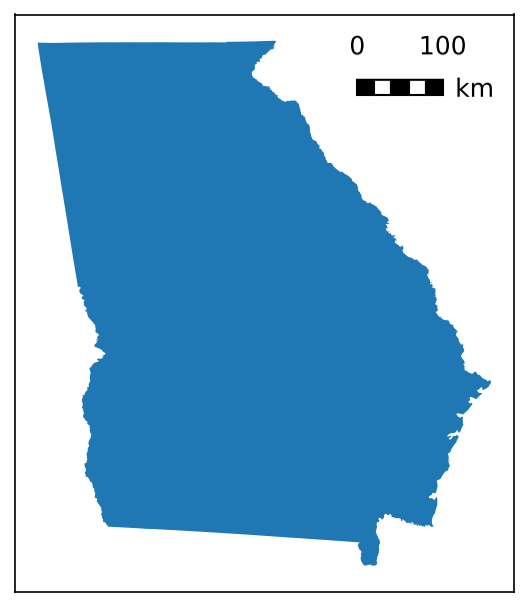

In [5]:
# Setting up a plot
fig, ax = new_map()
# Plotting a state (Georgia)
states.query("NAME=='Georgia'").plot(ax=ax)
# Adding a scale_bar to the upper-right corner of the axis - note that bar['projection'] MUST be set for this to work
scale_bar(ax=ax, location="upper right", style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"})

### **Using the** ``ScaleBar`` **class**
Alternatively, a `ScaleBar` class (based on `matplotlib.artist.Artist`) is also provided that allows the same bar to be rendered like so:

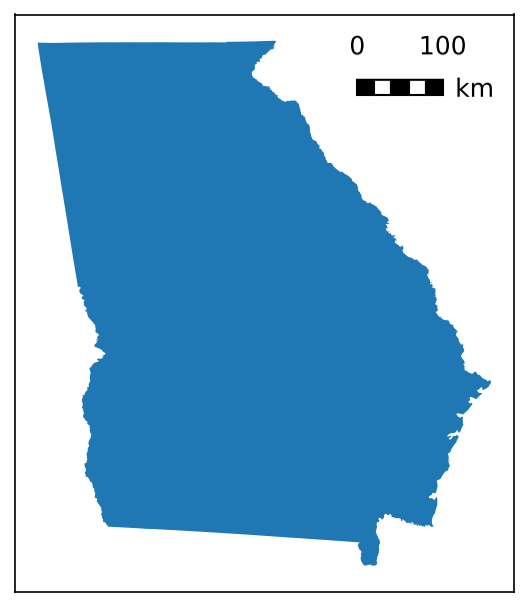

In [6]:
# Setting up a plot
fig, ax = new_map()
# Plotting a state (Georgia)
states.query("NAME=='Georgia'").plot(ax=ax)
# Creating a ScaleBar object that we want to place in the upper-right corner of the axis, 
# Note that here, we do not specify the axis
sb = ScaleBar(location="upper right", style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"})
# The ScaleBar can then be added using add_artist(), which calls its built-in draw() function:
ax.add_artist(sb)

#### **Re-using Objects**
The benefit of the ScaleBar object is that it can be re-used across multiple plots without copy-pasting the function call. This is particularly beneficially for highly-customized bars: you can simply set it up once, and then add it to each axis you want.

The caveat to this is that instead of using `ax.add_artist(ScaleBar)`, you have to use `ax.add_artist(ScaleBar.copy())`; as matplotlib does not let you add the same artist to multiple axes, you have to add a *copy* of the artist.

ValueError: Can not reset the Axes. You are probably trying to reuse an artist in more than one Axes which is not supported

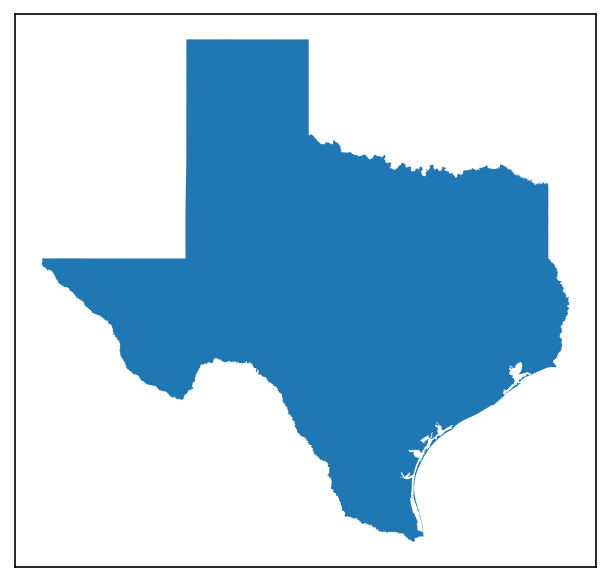

In [7]:
# Setting up a plot
fig, ax = new_map()
# Plotting a new state (Texas)
states.query("NAME=='Texas'").plot(ax=ax)
# Trying to re-use the same artist - this will throw an error
ax.add_artist(sb)

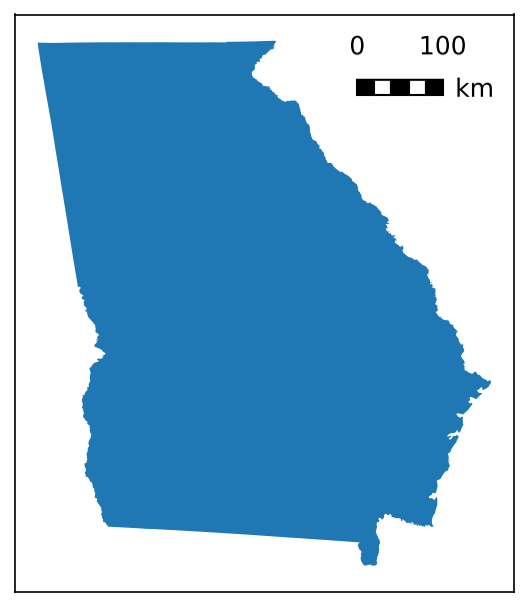

In [ ]:
# Instead we have to do this
fig, ax = new_map()
states.query("NAME=='Georgia'").plot(ax=ax)
sb = ScaleBar(location="upper right", style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"})
# Note that you have to use .copy() here too!
ax.add_artist(sb.copy())

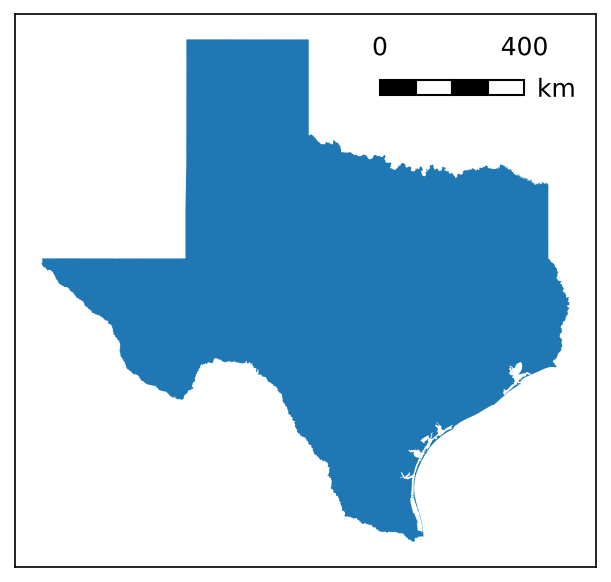

In [ ]:
# Now we can do this
fig, ax = new_map()
states.query("NAME=='Texas'").plot(ax=ax)
# Using .copy() again will work this time
# Note as well that the bar is not an exact copy of the one above - it auto-adjusts to your new plot, re-using the same high-level settings
ax.add_artist(sb.copy())

#### **Updating Class Objects**
The customization options of the ScaleBar can be accessed using dot notation (like sb.base, sb.label, etc.). They can also be updated from this dot notation by passing a valid style dictionary (see next section for details).

In [ ]:
# Showing the labels style options
sb.labels

{'style': 'first_last'}

In [ ]:
# Updating the label style option for "loc"
sb.labels = {"loc":"above"}
sb.labels

{'style': 'first_last', 'loc': 'above'}

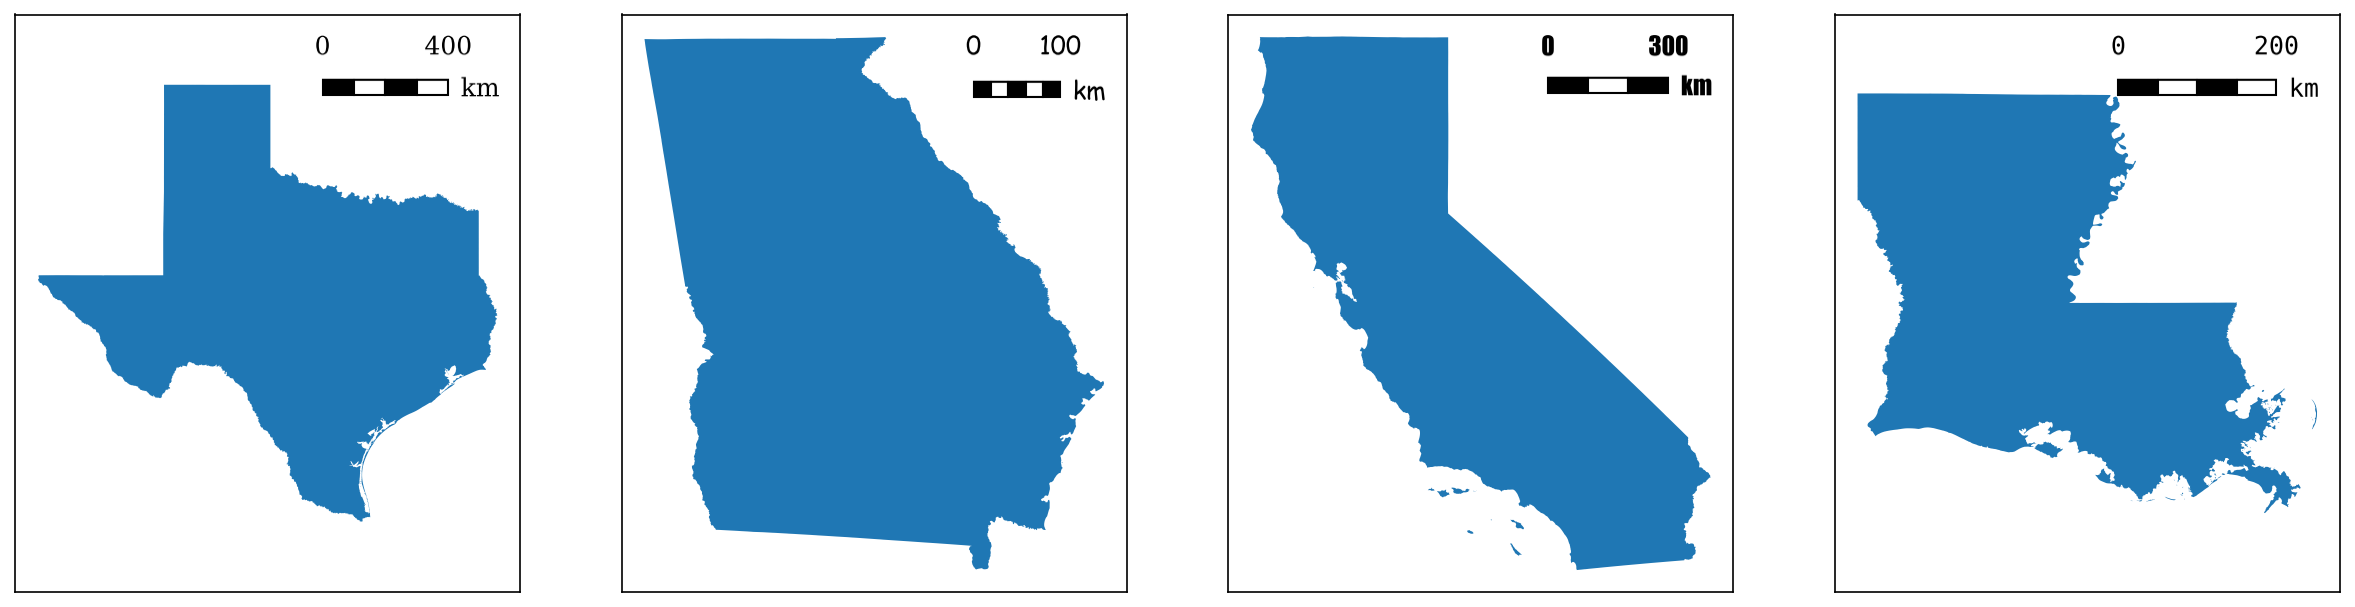

In [ ]:
# This allows you to do something like so:
shapes = ["Texas","Georgia","California","Louisiana"]
families = ["serif", "cursive", "fantasy", "monospace"]
# Creating the inital bar
sb = ScaleBar(location="upper right", style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"})
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,s,f in zip(axs.flatten(), shapes, families):
    states.query(f"NAME=='{s}'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    sb.text = {"fontfamily":f}
    ax.add_artist(sb.copy())

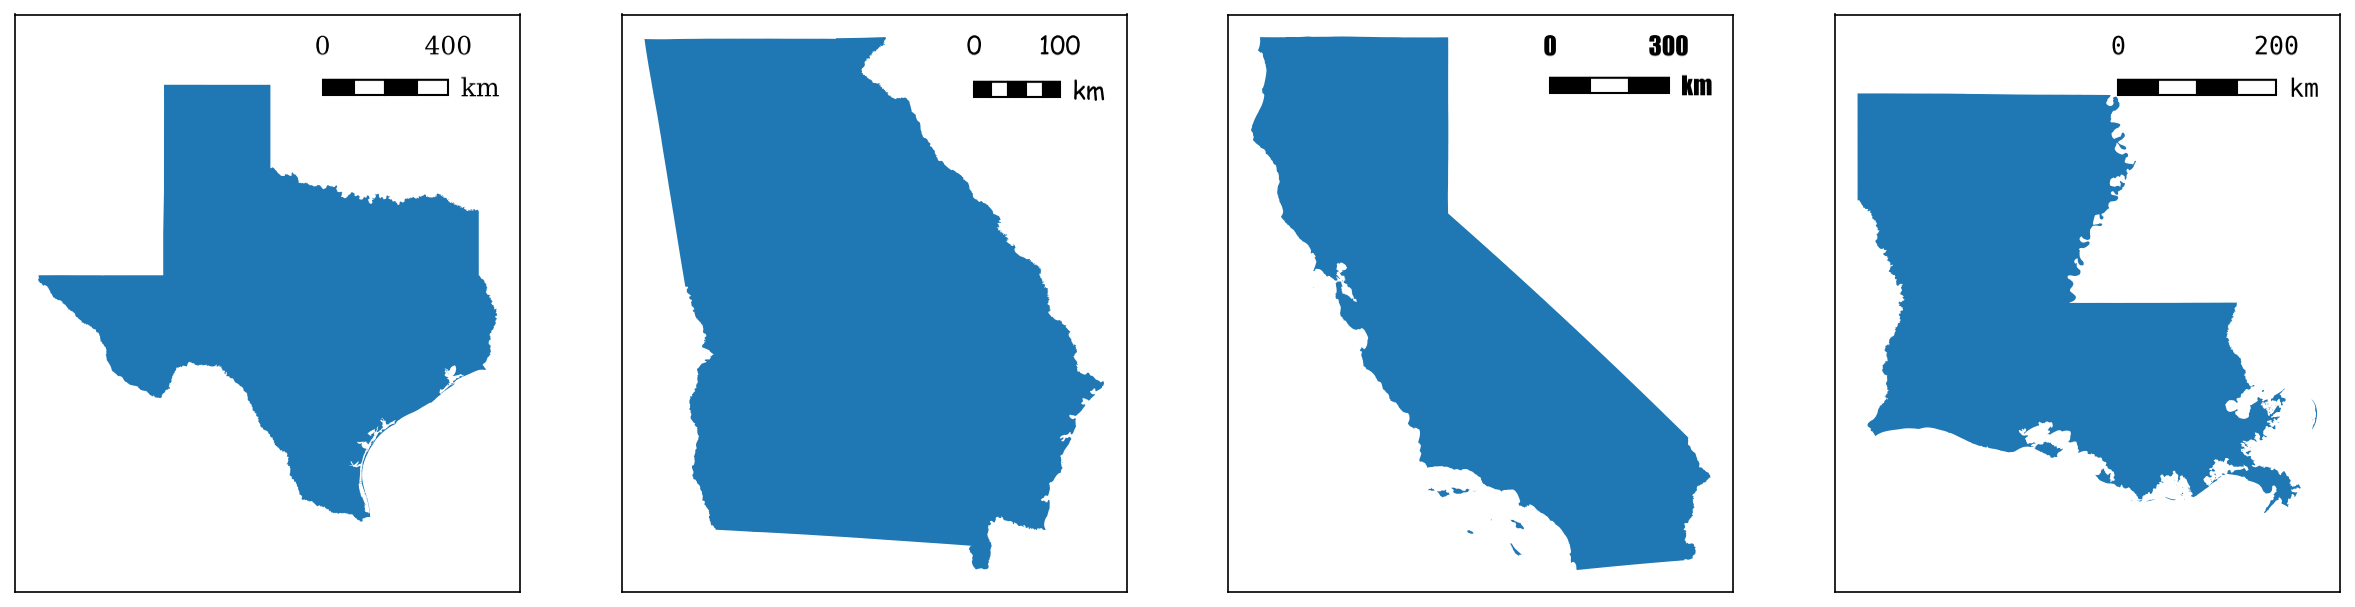

In [ ]:
# Though for this specific example, you could accomplish the same with the scale_bar() function just as (more?) easily
shapes = ["Texas","Georgia","California","Louisiana"]
families = ["serif", "cursive", "fantasy", "monospace"]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,s,f in zip(axs.flatten(), shapes, families):
    states.query(f"NAME=='{s}'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="upper right", style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"}, text={"fontfamily":f})

### **Customizing the Scale Bar**
Both the functional and object-oriented approach use the same primative style dictionaries, so you can treat the following information as valid for both

#### **Primary Settings**
There are two primary settings that must be supplied each time a north arrow is created:

* `location`: where the arrow will be placed relative to the plot. Will accept any of the options accepted by matplotlib for legend placement (`"upper right"`, `"center"`, `"lower left"`, etc., see *loc* in the [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) documentation). The default is `"upper right"`.

* `style`: what you want the scale bar to look like; as of now, there are two options: `"boxes"` (the default) and `"ticks"`. Note that some options change depending on what you select here!

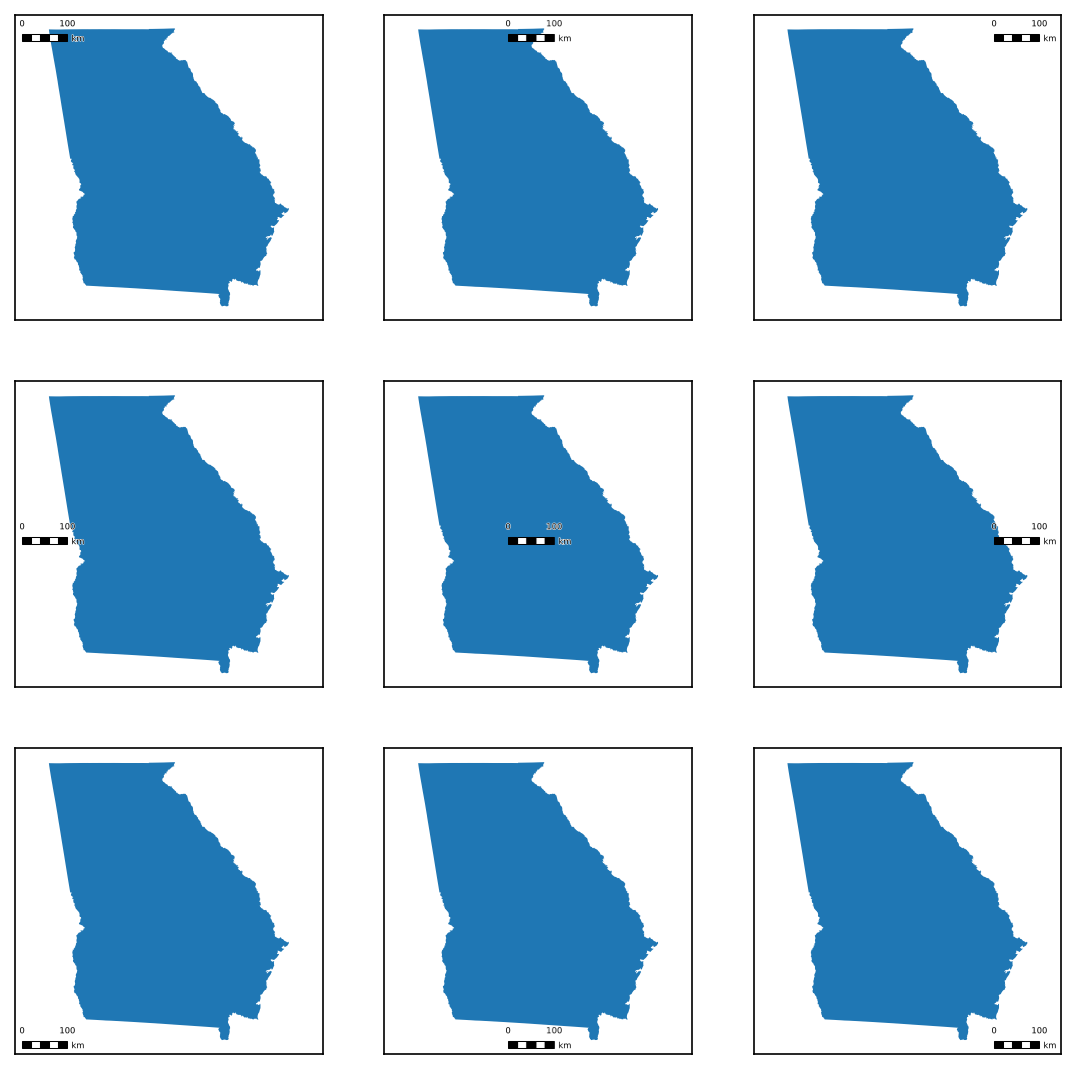

In [ ]:
# Do not worry about this: I cover it later
ScaleBar.set_size("xs")
# Grid of location options
# Note that the "center" options will feel slightly off: this is because the the center of the scale bar is of the entire artist, text included, not just the bar itself
locs = ["upper left", "upper center", "upper right", "center left", "center", "center right", "lower left", "lower center", "lower right"]
fig, axs = new_map(3,3, figsize=(9,9))
for ax,l in zip(axs.flatten(), locs):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location=l, style="boxes", bar={"projection":3857,"minor_type":"none"}, labels={"style":"first_last"})

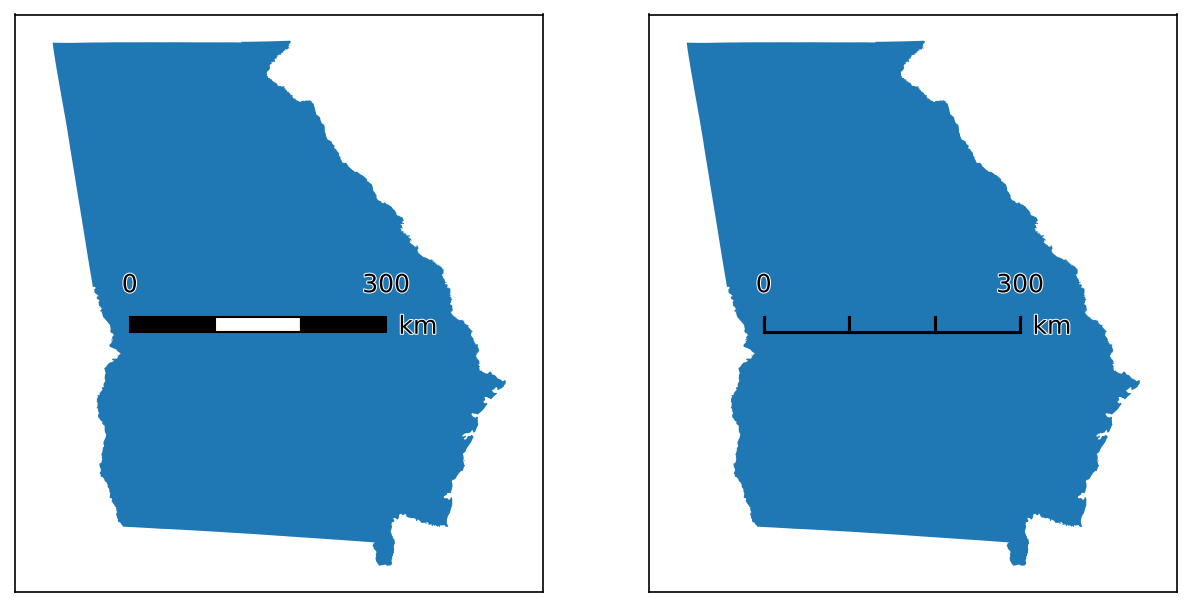

In [ ]:
# Just reverting the change I made above; again this is explained later, don't worry about it for now
ScaleBar.set_size("md")
# Modifying the styles
styles = ["boxes","ticks"]
# Creating 1x2 subplots
fig, axs = new_map(1,2, figsize=(10,5))
for ax,s in zip(axs.flatten(), styles):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style=s, bar={"projection":3857,"minor_type":"none","length":0.5}, labels={"style":"first_last"})

#### **Visible Components**
There are three "visible" components to the scale bar. Each of these is separately customizeable, but **unlike** the NorthArrow object, they **cannot** can be turned off entirely by passing a value of `False` to the function or object creation, as each component is necessary for a ScaleBar (passing `None` still uses default values).

##### **Bar**
`bar` is the most important component, and has the most customization options. 

* `projection`: **NOTE: THIS *MUST* BE SET!** (I am considering making it a top-level variable like `style` and `location`). The coordinate reference system (CRS) that the map is in. Will accept any `pyproj` CRS value (including strings and integers). Projected reference systems are preferred; unprojected ones will be approximated to metres based on the great circle distance.

* `unit`: The unit of measurement that you want the scale bar to be in. If left blank, will be the same as the unit of measurement of the `projection`. Otherwise, will handle conversion between the two: useful if you are using a projection in metres and want to convert it to kilometers or feet. See `validation.scale_bar.units_standard` for acceptable values, but the following shorthand will work: `m` for metres, `ft` for feet, `km` for kilometers, `yd` for yards, `mi` for miles, `nmi` for nautical miles.

* `rotation`: For rotating the scale bar an arbitrary number of degrees (between -360 and 360). Useful for creating a vertically-oriented scale bar.

* `max`: The max value of the scale bar, in the same units as `unit` (or `projection` if `unit` is None). If left blank, will be approximated based on the value of `length`.

* `length`: The desired length of the bar in **inches** (for values greater than 1) or as a **fraction of the axis width** (for values between 0 and 1). If left blank, will be approximated as ~25% of the axis. Note that any values set here will also be rounded for convenience: so if you want a 3 inch scale bar, but that equals 91,000 kilometers, you should expect that to be rounded down to 90,000 kilometers, and your scale bar to therefore be a little less than 3 inches.

* `height`: The desired height of the bar (cross-axis from the bar `length` regardless of orientation set by `rotation`) in **inches**. Will accept any integer. Note that for `ticks`, this will set the height of the `major` ticks (instead of the `minor` ones).

* `reverse`: Whether or not to flip the order of the bar's segments; for a "typical" scale bar, that would mean the max is on the left instead of the right. Will accept either `True` or `False`.

* `major_div`: The number of "major" divisions in the bar (see minor divisions below for the difference). Will accept any integer. Note that this can only be set alongside `max`: setting it on its own will not do anything. If left blank, will be approximated based on the `length` and `max` values.

* `minor_div`: The number of "minor" divisions *in each major division*: a bar with 2 major division and 2 minor divisions will have 4 divisions in total. Will accept any integer, but must be greater than 1 for a minor division to be visible.

* `minor_type`: Controls where minor divisions will appear. If set to `none`, will not have any minor divisions, regardless of what `minor_div` is set to. If set to `first`, then only the first *major* division will be subdivided: the rest will be intact. If set to `all`, *all* major divisions will be subdivided.

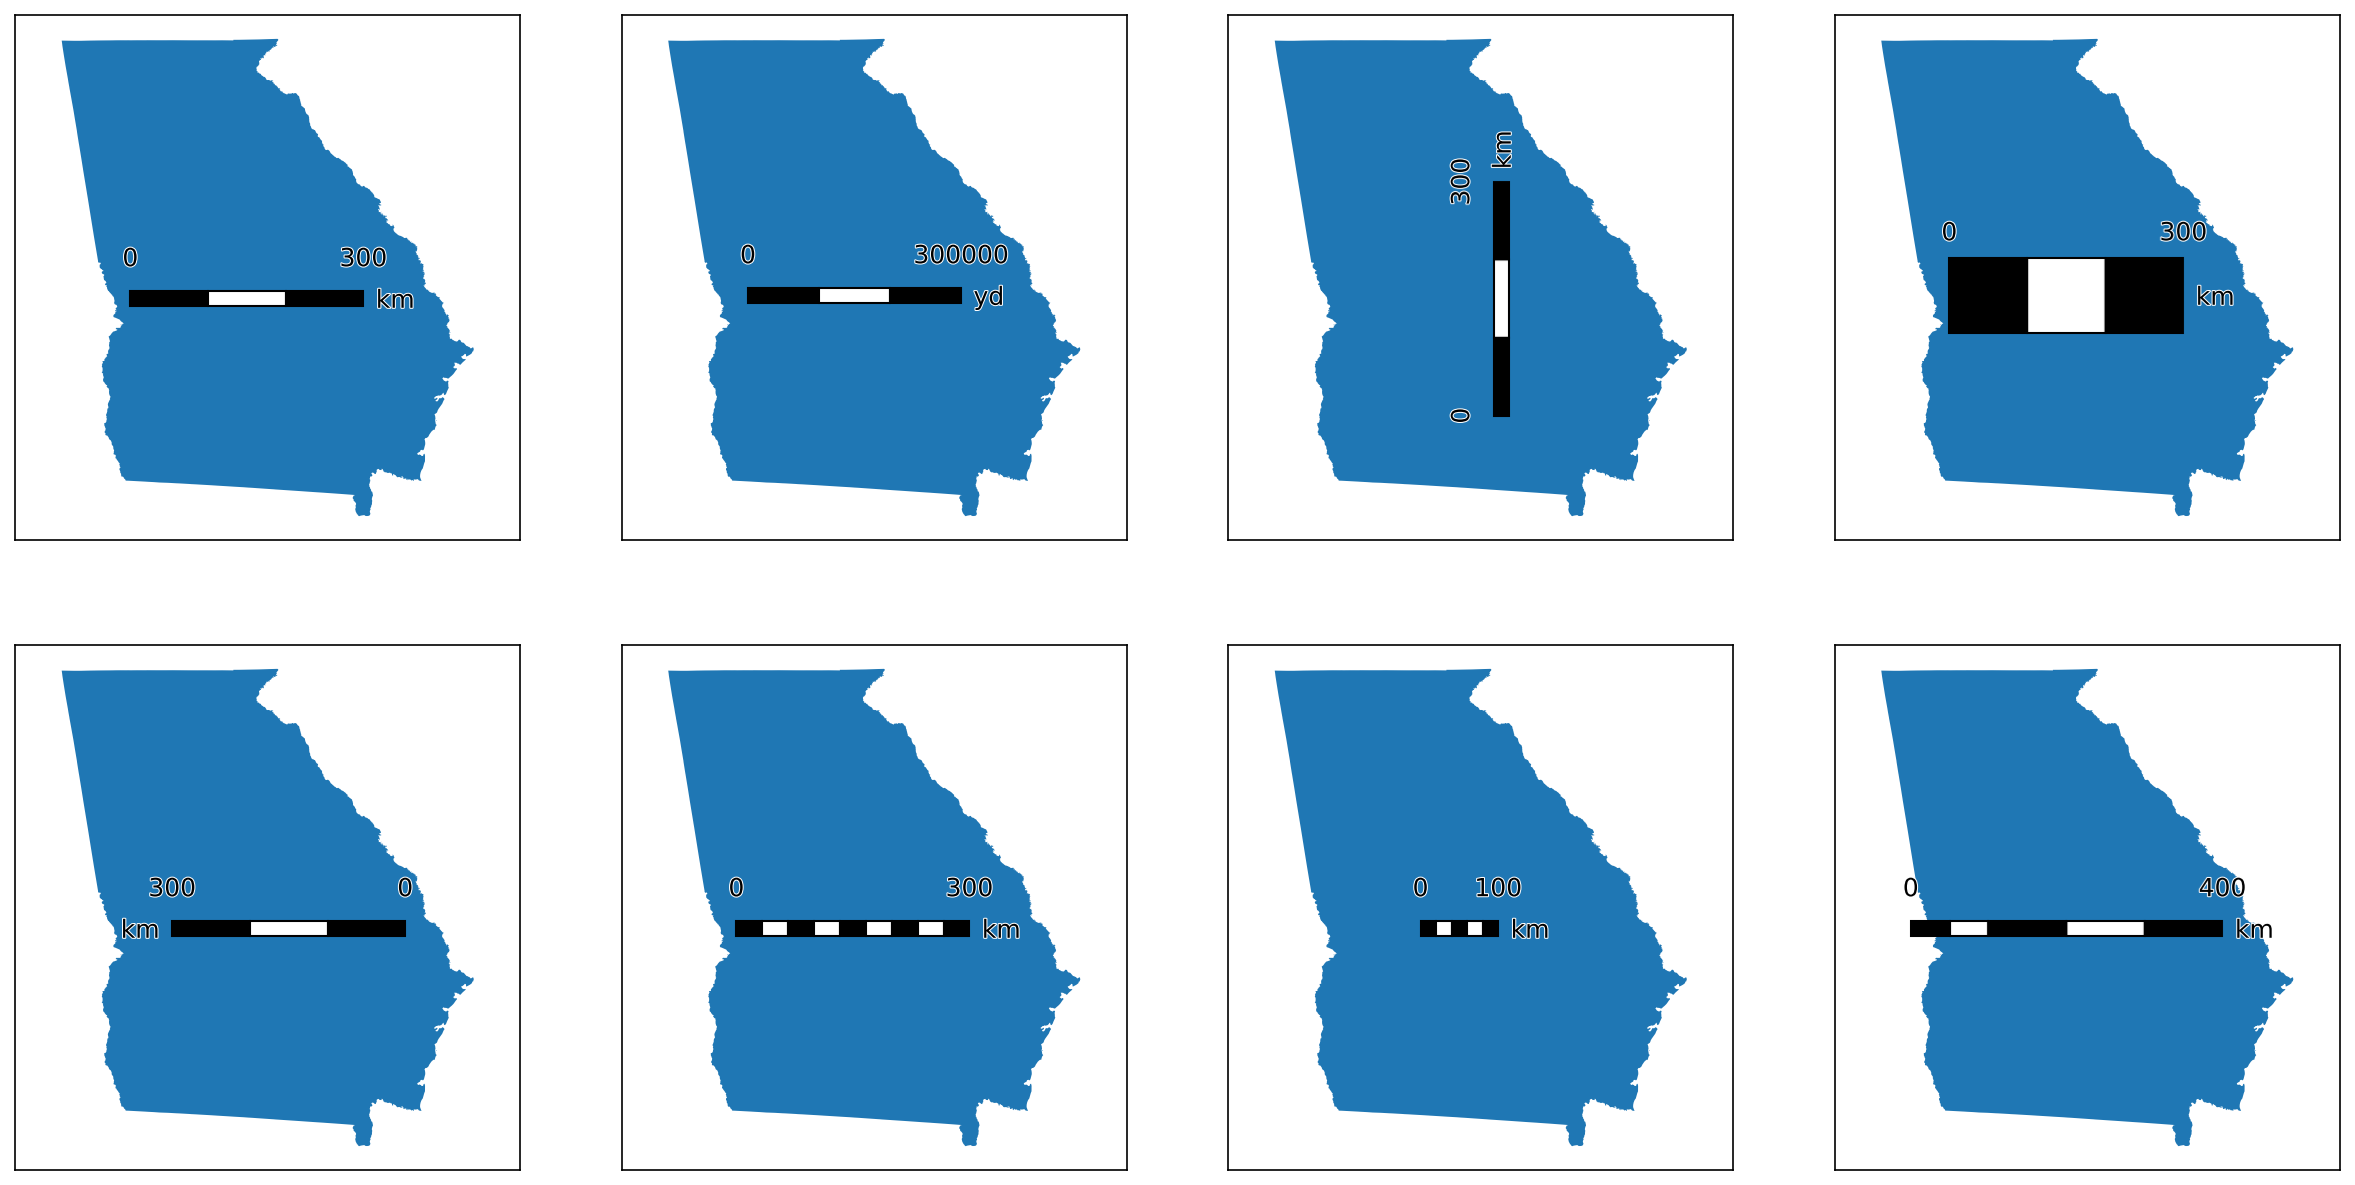

In [ ]:
# Modifying specific elements
modifications = [
    {}, # default settings for comparison
    {"unit":"yd"}, # converting units
    {"rotation":90}, # making the bar vertical
    {"height":0.5}, # increasing the height
    {"reverse":True}, # reversing the order of the bar
    {"minor_type":"all"}, # adding minor divisions
    {"length":0.2}, # shortening the bar
    {"length":None,"max":400,"major_div":4,"minor_div":2,"minor_type":"first"}, # setting all the bar divisions
]
# Creating 2x4 subplots
fig, axs = new_map(2,4, figsize=(20,10))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="boxes", labels={"style":"first_last"},
              bar={"projection":3857,"minor_type":"none","length":0.5} | m) # this line just concatenates the two dictionaries together

These next three are only valid options when `style` is set to `"boxes"`:

* `facecolors`: the color(s) of the division on the bar. Will accept any matplotlib color value. If a single value is passed, it will be used for all divisions. If a list is passed, it will be extended via cycling to the appropriate length (based on the number of division in the bar) if shorter, or it will be truncated, if longer.

* `edgecolors`: the color(s) of the edges of the divisions on the bar. Will accept any matplotlib color value. If a single value is passed, it will be used for all divisions. If a list is passed, it will be extended via cycling to the appropriate length (based on the number of division in the bar) if shorter, or it will be truncated, if longer.

* `edgewidth`: the width of the edge of the divisons. Will accept any positive float or integer. Only a singular value may be passed.

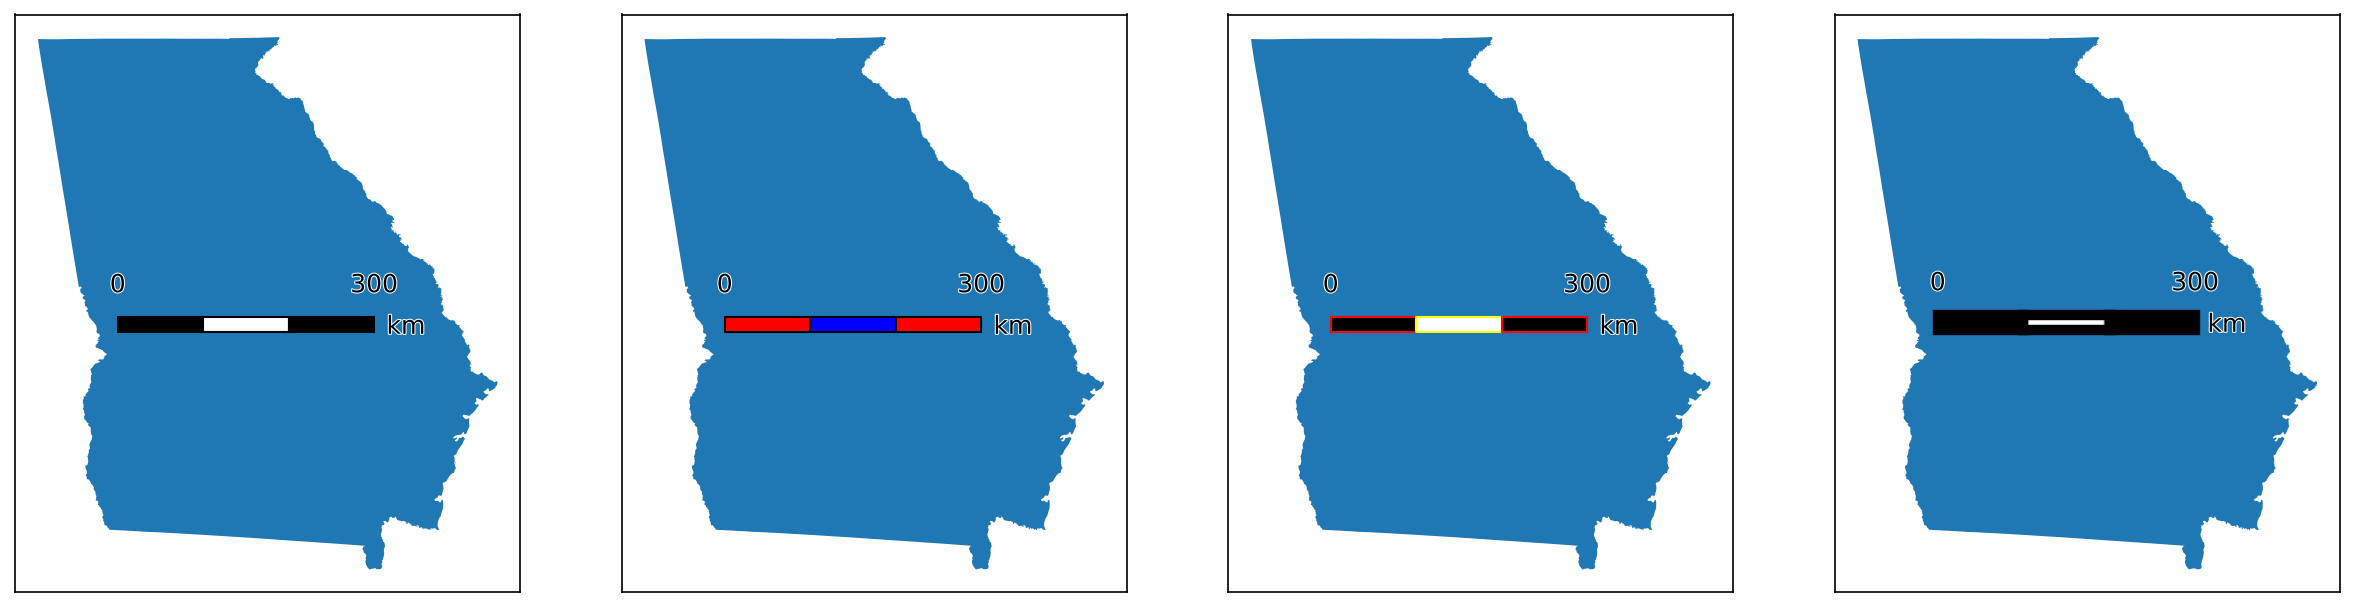

In [ ]:
# Modifying specific elements
modifications = [
    {}, # default settings for comparison
    {"facecolors":["red","blue"]}, # changing the colors of the divisions
    {"edgecolors":["red","yellow"]}, # changing the colors of the edges
    # NOTE: I do think this changes the length of the bar which I don't love, so large values not recommended (relative to plot size)
    {"edgewidth":5}, # changing the width of the edges 
]
# Creating 1x4 subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="boxes", labels={"style":"first_last"},
              bar={"projection":3857,"minor_type":"none","length":0.5} | m) # this line just concatenates the two dictionaries together

These next five are only valid options when `style` is set to `"ticks"`:

* `minor_frac`: the height of the `minor` ticks, as a *fraction of the height of the major ticks* (set by `height`); a value of `0.5` will create minor ticks half the height of the major ticks.

* `tick_loc`: the position of the ticks relative to the base bar. Can be any of `above`, `below`, or `middle` (if ticks should intersect the bar midway).

* `basecolors`: the color(s) of the segments that comprise the "base" of the scale bar. Will accept any matplotlib color value. If a single value is passed, it will be used for all divisions. If a list is passed, it will be extended via cycling to the appropriate length (based on the number of division in the bar) if shorter, or it will be truncated, if longer.

* `tickcolors`: the color(s) of the ticks marking the scale bar. Will accept any matplotlib color value. If a single value is passed, it will be used for all divisions. If a list is passed, it will be extended via cycling to the appropriate length (based on the number of division in the bar) if shorter, or it will be truncated, if longer.

* `tickwidth`: the width of the base bar and ticks. Will accept any positive float or integer. Only a singular value may be passed.

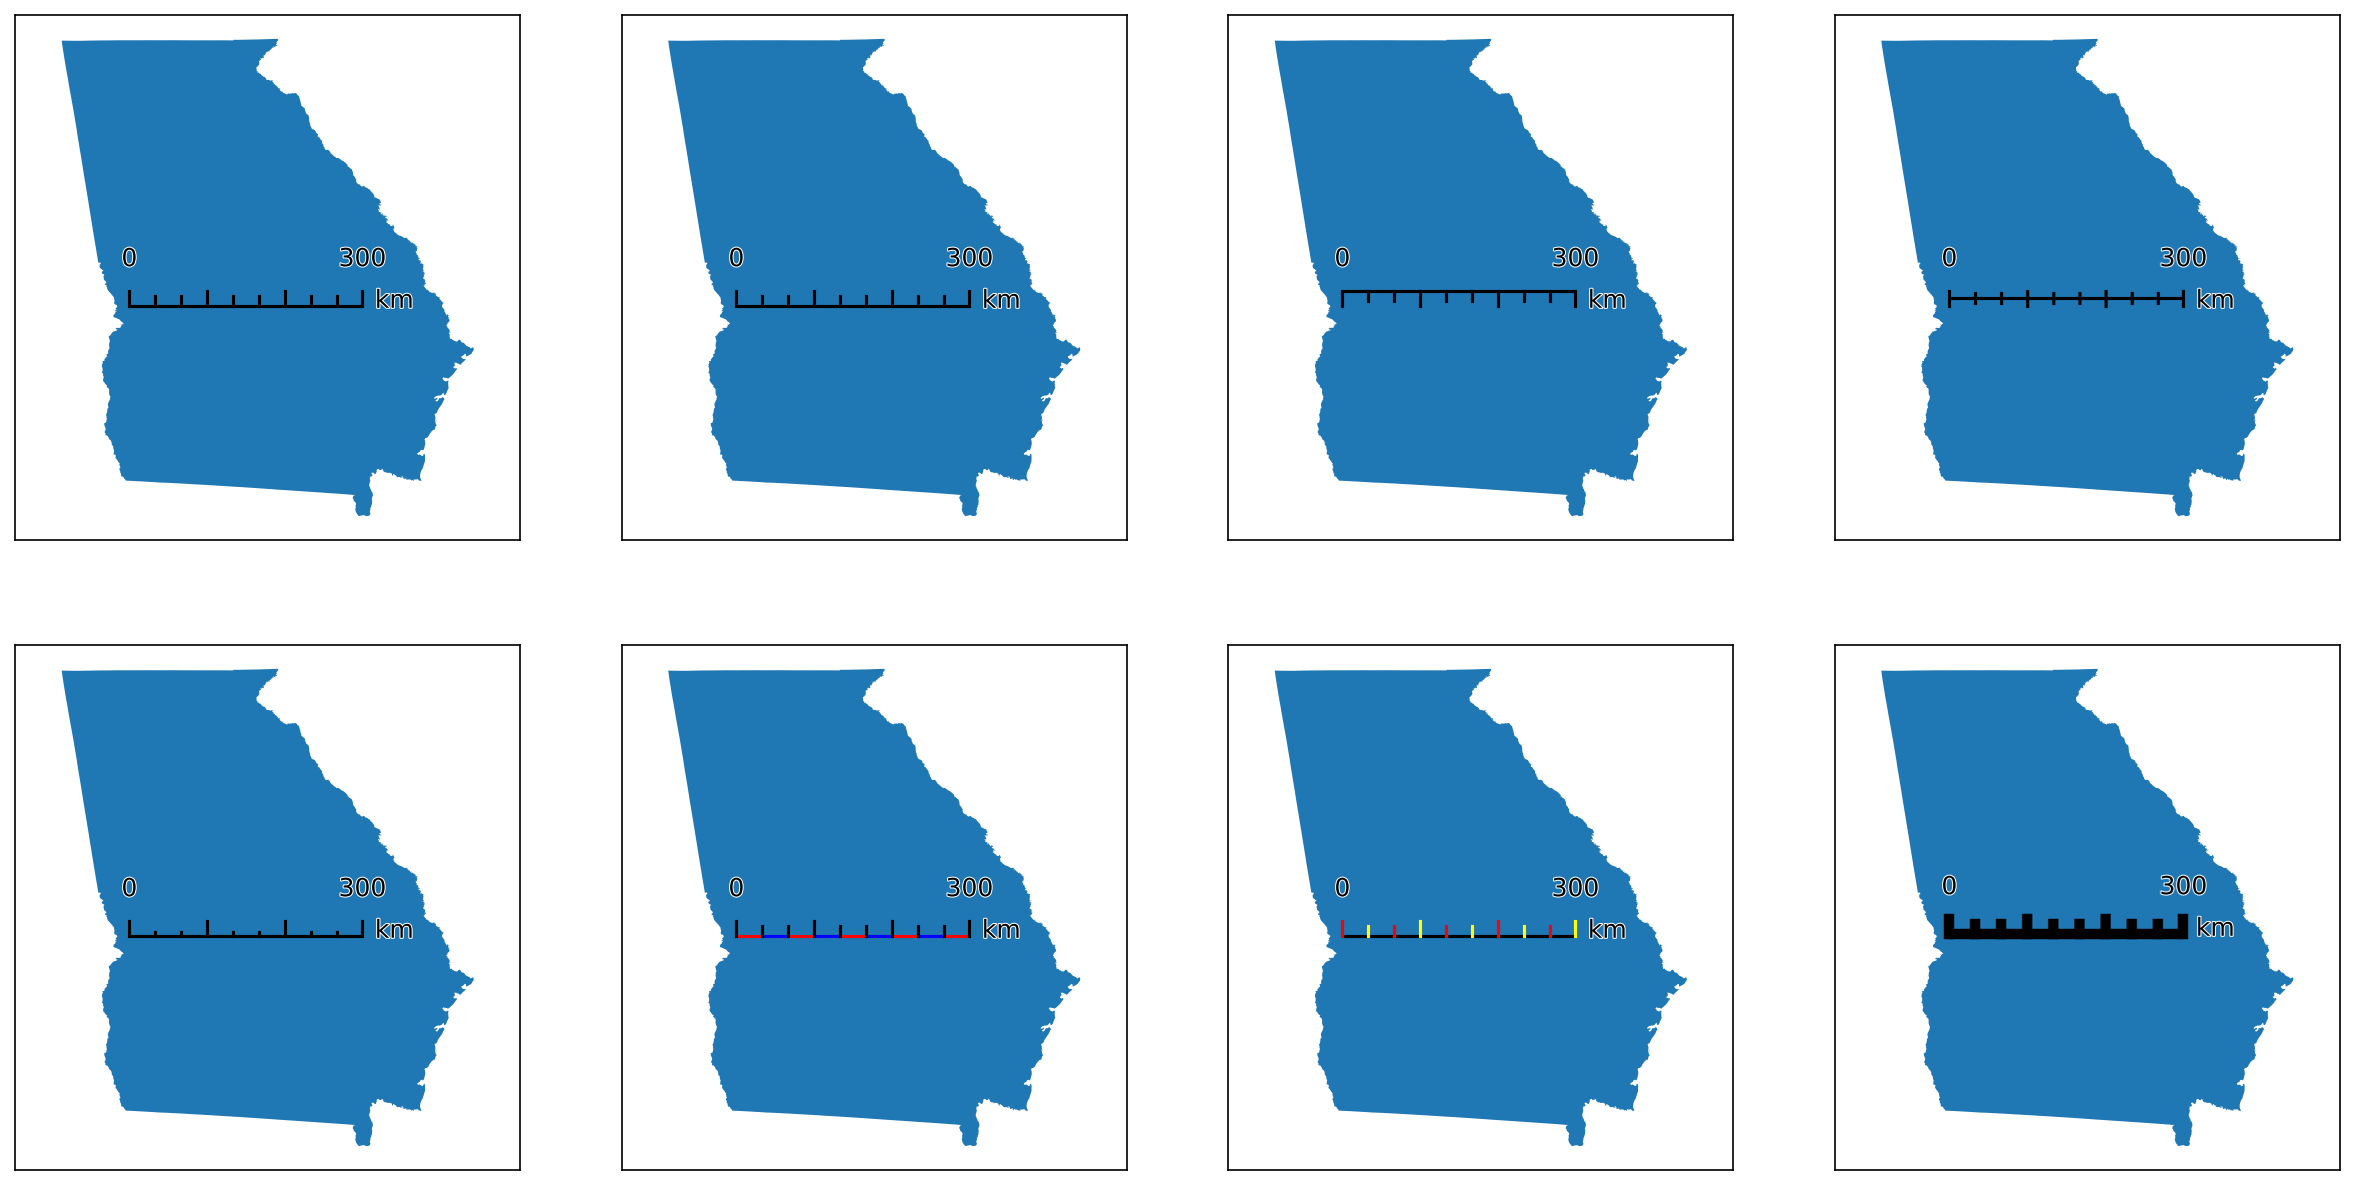

In [ ]:
# Modifying specific elements
modifications = [
    {}, # default settings for comparison
    # Iterating through the three tick locations
    {"tick_loc":"above"},
    {"tick_loc":"below"},
    {"tick_loc":"middle"},
    # Iterating through the other settings
    {"minor_frac":0.25}, # the default value is 0.66
    {"basecolors":["red","blue"]}, # changing the colors of the divisions
    {"tickcolors":["red","yellow"]}, # changing the colors of the edges
    {"tickwidth":5}, # changing the width of the edges 
]
# Creating 2x4 subplots
fig, axs = new_map(2,4, figsize=(20,10))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="ticks", labels={"style":"first_last"},
              bar={"projection":3857,"minor_type":"all","length":0.5} | m) # this line just concatenates the two dictionaries together

##### **Labels**
`labels` modifies the text that appears on the divisions of the scale bar (i.e. not including the units text).

* `labels`: the color(s) of the text. Will accept any matplotlib color value. If a single value is passed, it will be used for all label text. If a list is passed, it will be extended via cycling to the appropriate length (based on the number of division in the bar) if shorter, or it will be truncated, if longer. If `None`, the divisions will be auto-generated based on their values. Works in tandem with `style` - the number of labels provided should match the number expected based on the `style`.

* `format`: A format string that can be passed to format the auto-generated labels, if `labels` is `None`. Note: do *not* pass the leading semicolon (i.e. if you want to format with three decimal points, just pass `.3f`). Default is two decimals (`.2f`).

* `format_int`: If `True`, will format "round" floats as integers, by removing their trailing decimals. If `False`, will apply the `format` string to them. Default is `True`.

* `style`: Controls *which* labels are placed. 
    * If `major`, labels will be placed on each major division, regardless of if minor divisions exist (# labels = `major_div`). 
    * If `first_last`, labels will be placed on the first (0) and last major division (# labels = 2). 
    * If `last_only`, labels will be placed exclusively on the last major division (# labels = 1).
    * If `minor_all`, labels will be placed on each major *and* minor division, for each minor division that exists (# labels = `major_div * minor_div`).
    * If `minor_first`, labels will be placed on each major division, and the first (and *only* the first) minor division (# labels = `major_div + 1`).

* `loc`: Controls *where* labels are placed. If `above`, labels will be placed above the bar; if `below`, labels will be placed below.

* `fontsize`: The size of the text. Will accept any float, int, or string value (such as `small` or `xx-large`) - see matplotlib documentation for more details.

* `textcolors`: the color of the main text. Will accept any matplotlib color value.

* `fontfamily`: The appearance of the text - see matplotlib documentation for more details. Can be any of `serif`, `sans-serif`, `cursive`, `fantasy`, or `monospace`.

* `fontstyle`: The appearance of the text - see matplotlib documentation for more details. Can be any of `normal`, `italic`, or `oblique`.

* `fontweight`: The appearance of the text - see matplotlib documentation for more details. Can be any of `normal`, `bold`, `heavy`, `light`, `ultrabold`, or `ultralight`.

* `stroke_width`: The width of the outline of the text. Will accept any positive float or integer.

* `stroke_color`: The color of the outline of the text. Will accept any matplotlib color value.

* `rotation`: The rotation of the text in-place, expressed in degrees. Accepts values between -360 and 360. Works in tandem with `rotation_mode` (below).

* `rotation_mode`: Changes how the rotation of the text occurs. Recommend looking at matplotlib's documentation for details. Can be either `anchor` or `default`.

* `sep`: The amount of padding between the labels and the bar, in points. Will accept any positive float or integer.

* `pad`: The amount of padding around the combined bar and label text, in points. Will accept any positive float or integer. *Note that this is usually kept at 0, as the change is a little nuanced.*

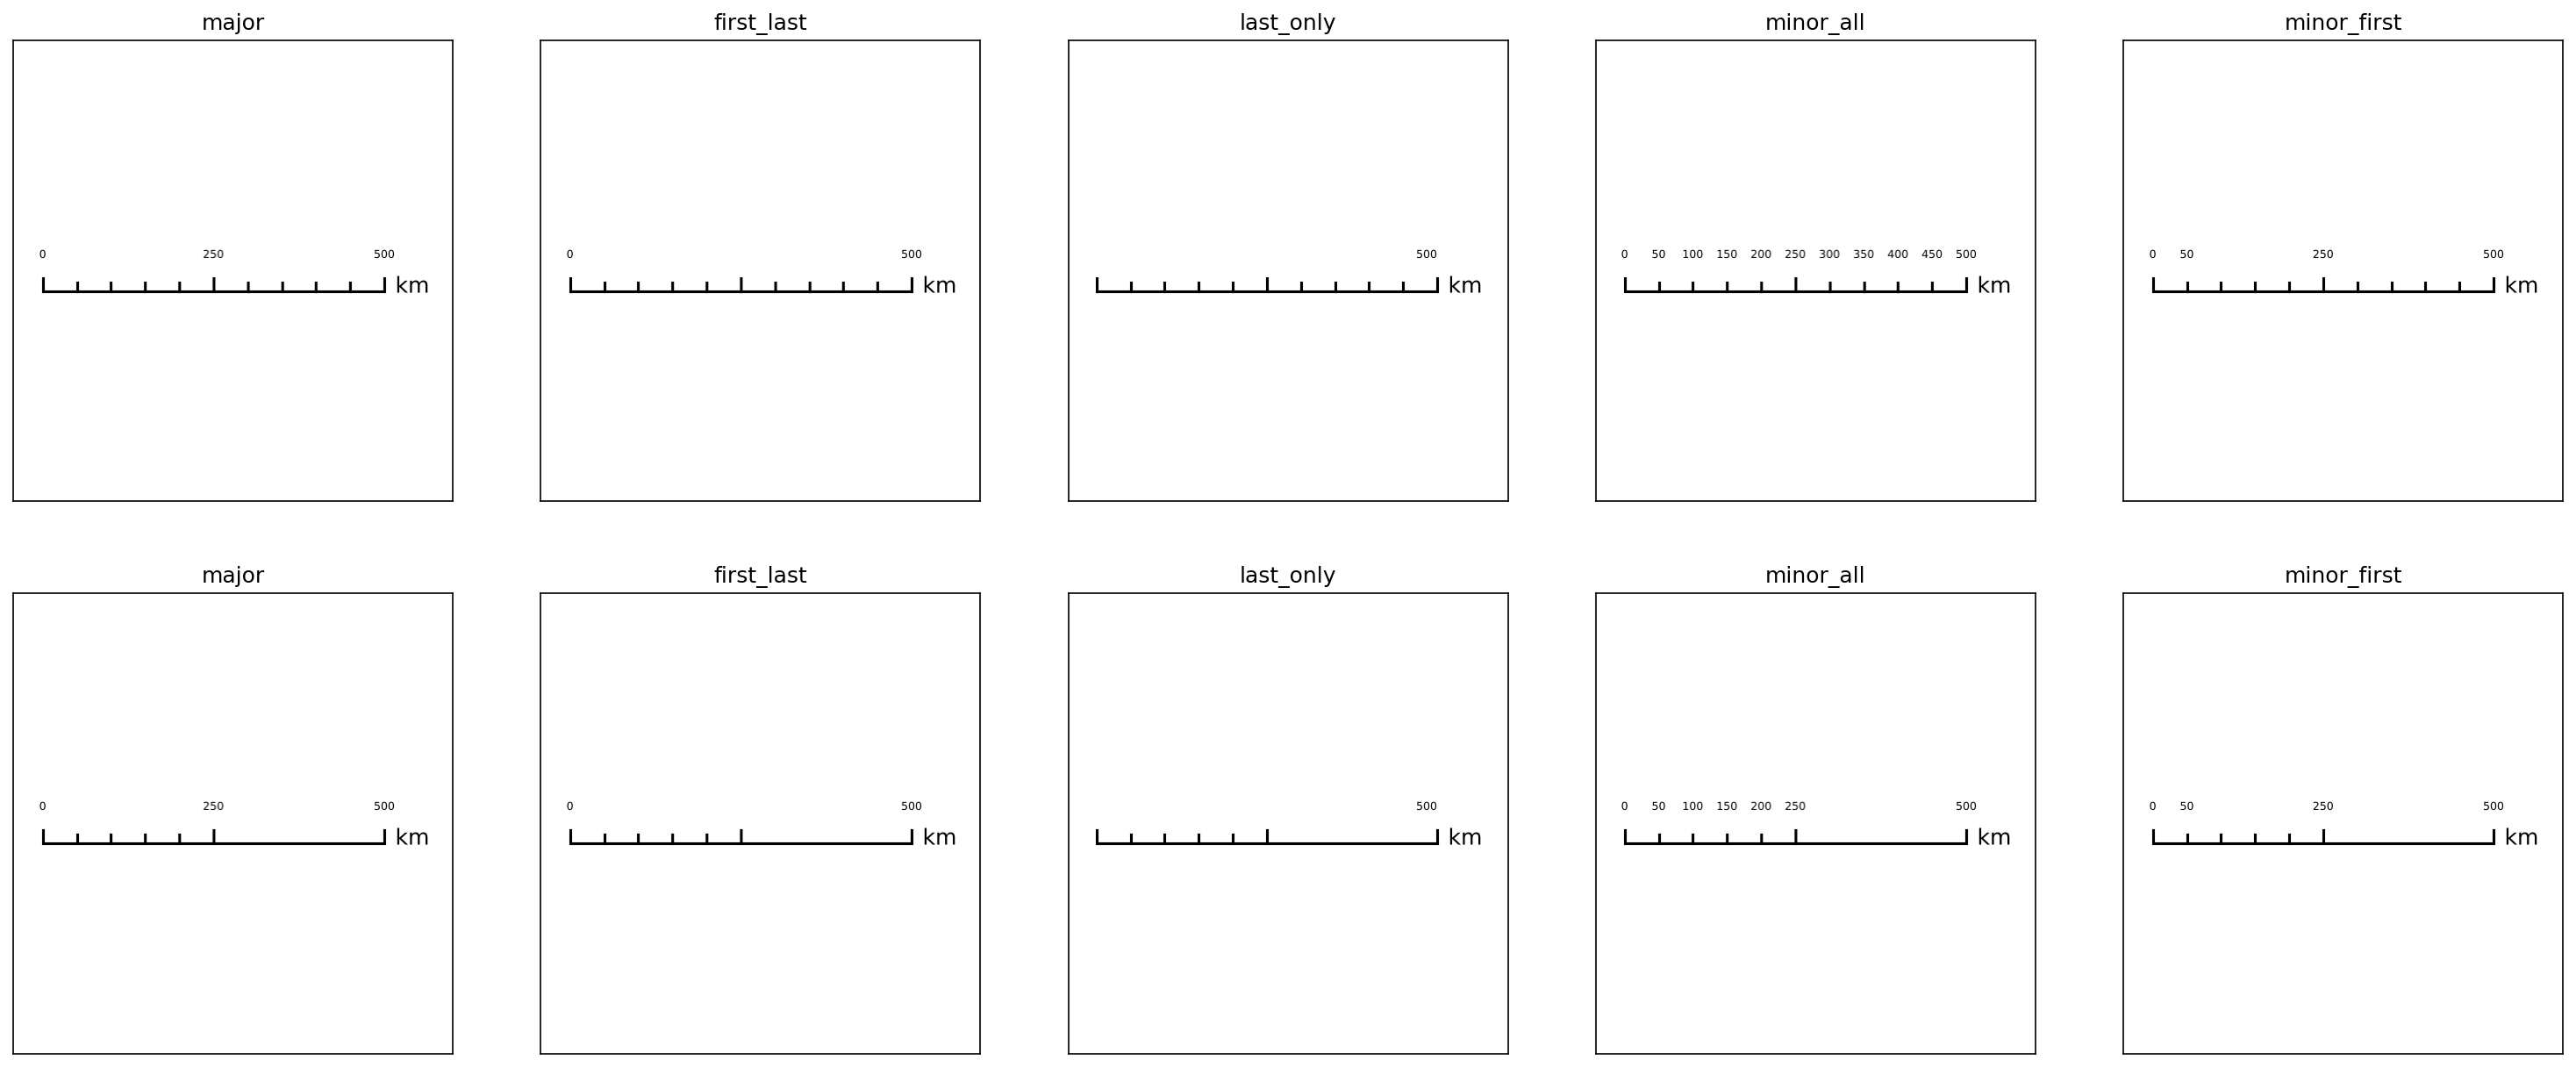

In [ ]:
# This block will show the different label combinations
# Creating 2x5 subplots
fig, axs = new_map(2,5, figsize=(25,10))
# Now we define the different label settings
modifications = [
    # Iterating through the label styles
    {"style":"major"},
    {"style":"first_last"},
    {"style":"last_only"},
    {"style":"minor_all"},
    {"style":"minor_first"},
]
# We'll first iterate through each of the two minor_types
for axc,t in zip(axs, ["all","first"]):
    for ax,m in zip(axc, modifications):
        states.query(f"NAME=='Georgia'").plot(ax=ax, color="white")
        ax.set_aspect(1, adjustable="datalim")
        scale_bar(ax=ax, location="center", style="ticks", labels={"fontsize":6} | m, # NOTE: I shrunk this text just to make it more visible
                  bar={"projection":3857,"max":500,"major_div":2,"minor_div":5,"minor_type":t})
        ax.set_title(m["style"])

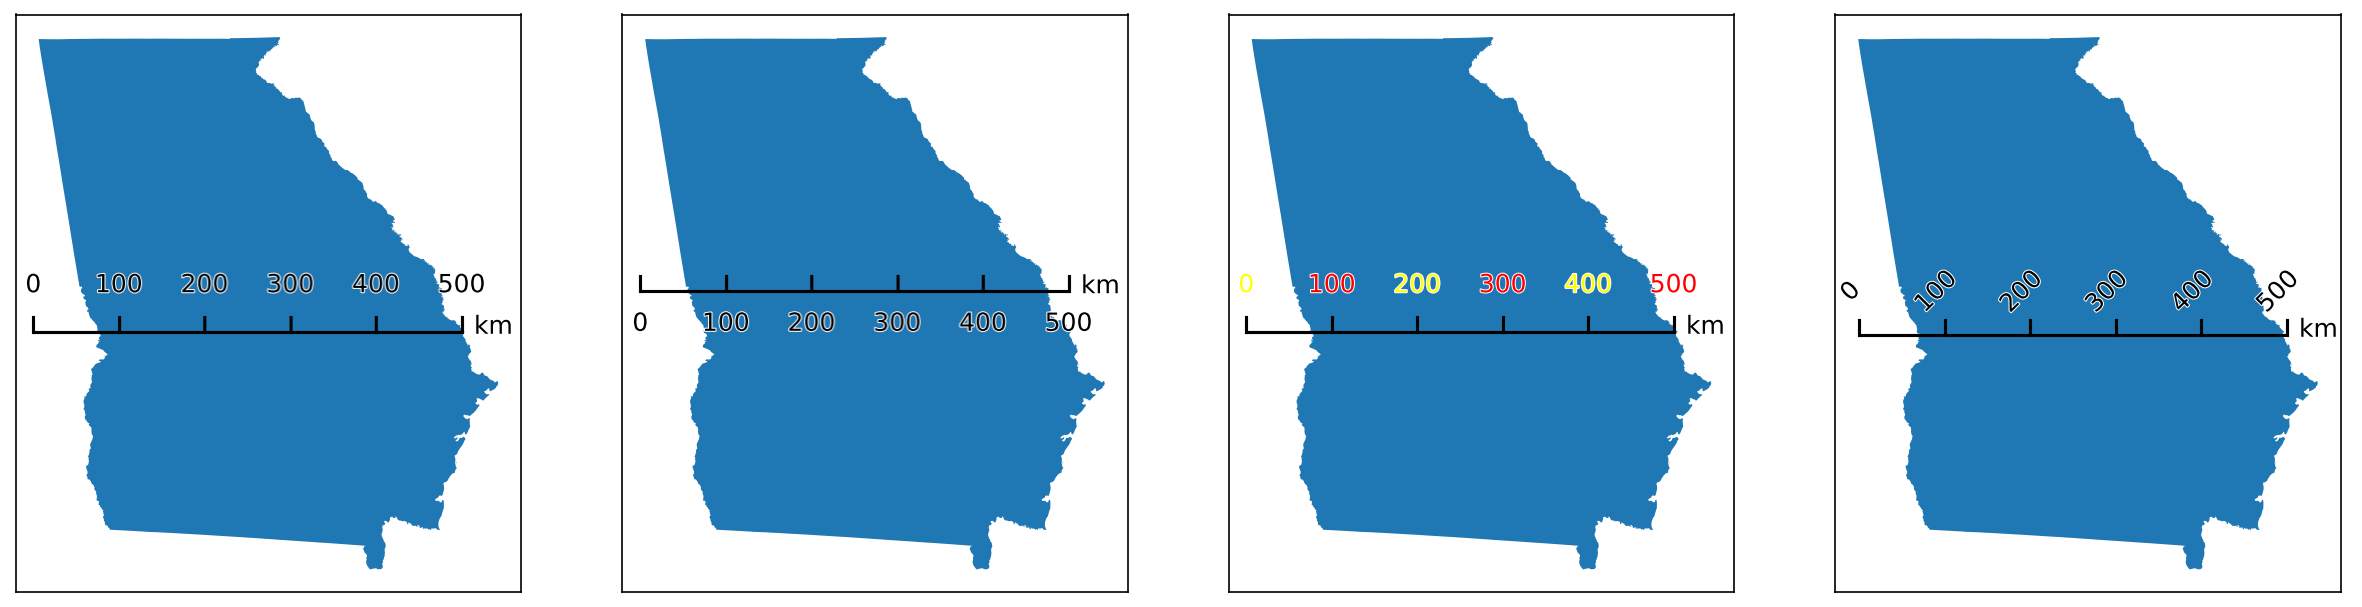

In [13]:
# Modifying specific elements
modifications = [
    {"loc":"above"},
    {"loc":"below"},
    {"textcolors":["yellow","red"]},
    {"rotation":45}, # changing the colors of the divisions
]
# Creating 1x4 subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    scale_bar(ax=ax, location="center", style="ticks", labels={"style":"major"} | m, # changed the style to major here
              bar={"projection":3857,"max":500,"major_div":5,"minor_div":1,"minor_type":t}) 

#### **Formatting Components**
There are three "invisible" components to the north arrow - so called because they are mainly there to help position the arrow and its individual components. Unlike the "visible" components, these cannot be turned off, but they are still separately customizeable.

##### **Pack**
`pack` customizes the [`HPacker`](https://matplotlib.org/stable/api/offsetbox_api.html#matplotlib.offsetbox.HPacker) or [`VPacker`](https://matplotlib.org/stable/api/offsetbox_api.html#matplotlib.offsetbox.VPacker) object that handles the positioning of the `label` relative to the `base` patch (and `fancy` patch if it is included). Whether or not it is an `HPacker` or `VPacker` is used is dependent on the `position` option from the `label`, but the settings are the same for both.
* `sep`: The amount of spacing to have *between the elements*, in points. Will accept any positive float or integer.

* `align`: How each element is aligned. Can be any of `top`, `bottom`, `left`, `right`, `center`, or `baseline`.

* `pad`: The amount of padding around the box, in points. Will accept any positive float or integer. *Note that this is usually kept at 0, and controlled instead using the `aob` settings (below).*

* `width` and `height`: The dimensions of the box, in pixels. Will accept any positive float or integer. *Kept as `None` for most circumstances so calculated manually.*

* `mode`: How the elements are packed within the box. Can be any of `fixed`, `expand`, or `equal`. See documentation for `HPacker` and `VPacker` as to how each mode works. *Default is `fixed`.

In [ ]:
# Modifying specific elements
modifications = [
    None, # default settings
    {"sep": 15}, # increased separation between items
    {"align": "left"}, # changing the alignment of items
    {"width": 100, "height": 200, "mode": "expand"}, # changing the mode, not a great example
]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, pack=m)

##### **AOB**
`aob` customizes the [`AnchoredOffsetBox`](https://matplotlib.org/stable/api/offsetbox_api.html#matplotlib.offsetbox.AnchoredOffsetbox) object that handles the positioning of the final north arrow object with respect to the *plot*. Note that `facecolor`, `edgecolor`, and `alpha` are non-standard options.

* `facecolor`: The color of the `AnchoredOffsetBox` patch. Will accept any matplotlib color value.

* `edgecolor`: The color of the edge of the `AnchoredOffsetBox` patch. Will accept any matplotlib color value.

* `alpha`: The transparency of the `AnchoredOffsetBox` patch. Will accept any matplotlib color value.

* `pad`: The amount of padding around the north arrow, defining the edges of the `AnchoredOffsetBox`. Expressed as *a fraction of the fontsize specified in `prop`*. Will accept any positive float or integer.

* `borderpad`: The amount of padding between the `AnchoredOffsetBox` and the `bbox_to_anchor`, if one is specified. Expressed as *a fraction of the fontsize specified in `prop`*. Will accept any positive float or integer.

* `prop`: A reference fontsize used to define the paddings of `pad` and `borderpad`. Will accept any valid fontsize input.

* `frameon`: Whether or not to draw a frame around the box. Will accept either `True` or `False`.

* `bbox_to_anchor` and `bbox_transform`: Used to customize the placement of the `AnchoredOffsetBox`. See *Tips and Tricks* section for details.

In [ ]:
# Modifying specific elements
modifications = [
    {"facecolor": "black"}, # different facecolor
    {"edgecolor": "red"}, # different edgecolor
    # these two show the difference between pad and borderpad
    {"edgecolor": "red", "pad": 3}, # increased pad
    {"edgecolor": "red", "borderpad": 3}, # increased borderpad
]
# Creating four subplots
fig, axs = new_map(1,4, figsize=(20,5))
for ax,m in zip(axs.flatten(), modifications):
    states.query(f"NAME=='Georgia'").plot(ax=ax)
    ax.set_aspect(1, adjustable="datalim")
    north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, aob=m)

##### **Rotation**
`rotation` controls how the north arrow is rotated so that it points upwards (towards true north). There are two ways to customize this.
* `degrees`: If `degrees` is set to a value (between -360 and 360), the arrow will simply be rotated to that point. This can be used to point to other directions is necessary, or if the direction to north is known.

* `crs`, `reference`, and `coords`: If the direction to north is *not* known, it can be automatically calcuated with three pieces of information:
  
  * `crs`: The coordinate reference system that the map is in. Will accept any `pyproj` CRS value (including strings and integers).
  
  * `reference`: The *type* of reference point from which north will be calcualted. Can be any of `axis`, `data`, or `center`.
  
  * `coords`: A tuple of coordinates from which north will be calculated. Each coordinate can be either a float or an integer.
    
    * If `reference` is `axis`, then `coords` should be in *axis* coordinates, where (0,0) represents the bottom-left point of the plot, and (1,1) represents the top-right point of the plot.
    
    * If `reference` is `data`, then `coords` should be in *data* coordinates, meaning that of the CRS supplied by `crs`.
    
    * If `reference` is `center`, then a value of `coords` is not necessary - it is the equivalent of setting `reference` to `axis` and `coords` to (0.5, 0.5). This is how most common software such as ArcGIS Pro and QGIS calculate the rotation of the north arrow.

In [ ]:
# Demonstrating how the rotation changes based on the reference point
modifications = [
    ["lower left", {"crs":3520, "reference":"axis", "coords":(0.1, 0.1)}],
    ["upper left", {"crs":3520, "reference":"axis", "coords":(0.1, 0.9)}],
    ["upper right", {"crs":3520, "reference":"axis", "coords":(0.9, 0.9)}],
    ["lower right", {"crs":3520, "reference":"axis", "coords":(0.9, 0.1)}],
]
# Creating a single plot for the contiguous USA
to_exclude = ['Hawaii','Alaska','Guam','Commonwealth of the Northern Mariana Islands','United States Virgin Islands','American Samoa','Puerto Rico']
fig, ax = new_map(1,1, figsize=(4,6))
# Note that I'm using a CRS here that will create rotations explicitly! 3520 is really only suitable for Georgia.
states.query(f"NAME not in {to_exclude}").to_crs(3520).plot(ax=ax)
for m in modifications:
    north_arrow(ax=ax, location=m[0], rotation=m[1])

### **Tips and Tricks**

#### **Setting Size**
While the north arrow can nominally have its size changed by changing the `scale` attribute, doing so doesn't change the other, related components, such as the sizes of the text, the shadow's offset, the stroke widths, and so on.

However, given that there are standardized paper sizes that most graphics are made towards, a specific function, `set_size()`, is provided that will batch-update the default values of the north arrow to approximate what looks best at each size. The function takes in only one input, which is the size you want to update the arrow to be:

* `xsmall` or `xs` for A8 paper, ~2 to 3 inches

* `small` or `sm` for A6 paper, ~4 to 6 inches

* `medium` or `md` for A4 or letter paper, ~8 to 11 inches

* `large` or `lg` for A2 paper, ~16 to 24 inches

* `xlarge` or `xl` for A0 paper, ~33 to 48 inches

These default values can be seen in `defaults.py`.

In [ ]:
# Creating an empty plot - for reference, this is 10 inches x 5 inches
fig, ax = new_map(1,1, figsize=(10,5))
# Visualizing the different sizes at various positions
for l,s in zip([0.1, 0.2, 0.35, 0.55, 0.85], ["xs","sm","md","lg","xl"]):
    # Calling the function to update the defaults
    NorthArrow.set_size(size=s)
    north_arrow(ax=ax, location="center", label={"text":s}, rotation={"degrees":0}, aob={"bbox_to_anchor":(l, 0.5), "bbox_transform":ax.transAxes})

#### **Placing Arrows Outside of Axis**
Sometimes it is more desireable to place the arrow outside of the plot entirely, which can be accomplished using `bbox_to_anchor` and `bbox_transform` from the `aob`component settings. This works the same way it does for [`matplotlib.pyplot.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend).

In [ ]:
fig, ax = new_map()
NorthArrow.set_size(size="sm")
states.query("NAME=='Georgia'").plot(ax=ax)
north_arrow(ax=ax, location="upper right", rotation={"degrees":0}, aob={"bbox_to_anchor":(1.1,1), "bbox_transform":ax.transAxes})